# Kernel PCA

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.datasets.samples_generator import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

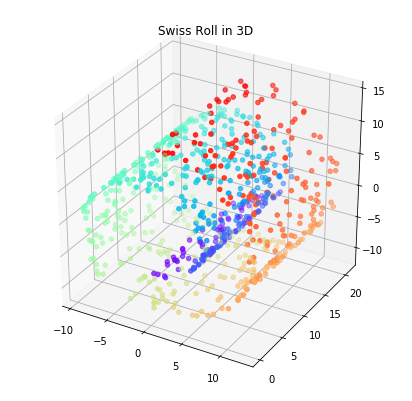

In [48]:
X, color = make_swiss_roll(n_samples=800, random_state=123)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow)
plt.title('Swiss Roll in 3D')
plt.show()

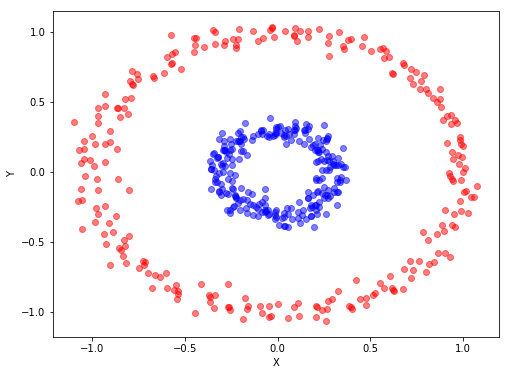

In [49]:
X, Y = make_circles(500, factor=.3, noise=.05)
plt.figure(figsize=(8,6))
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='red', alpha=0.5)
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='blue', alpha=0.5)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

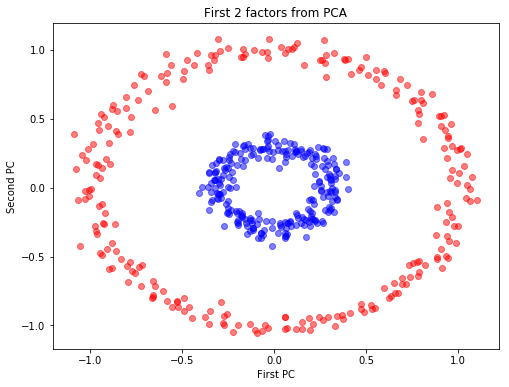

In [50]:
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[Y==0, 0], X_spca[Y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[Y==1, 0], X_spca[Y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 factors from PCA')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.show()

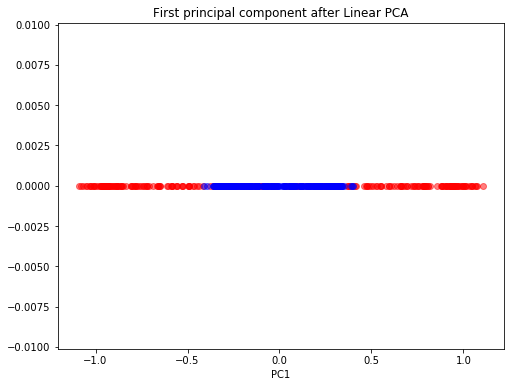

In [51]:
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_spca[Y==0, 0], np.zeros(X_spca[Y==0,:].shape), color='red', alpha=0.5)
plt.scatter(X_spca[Y==1, 0], np.zeros(X_spca[Y==1,:].shape), color='blue', alpha=0.5)

plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')

plt.show()

In [52]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = PCA()
X_pca = pca.fit_transform(X)

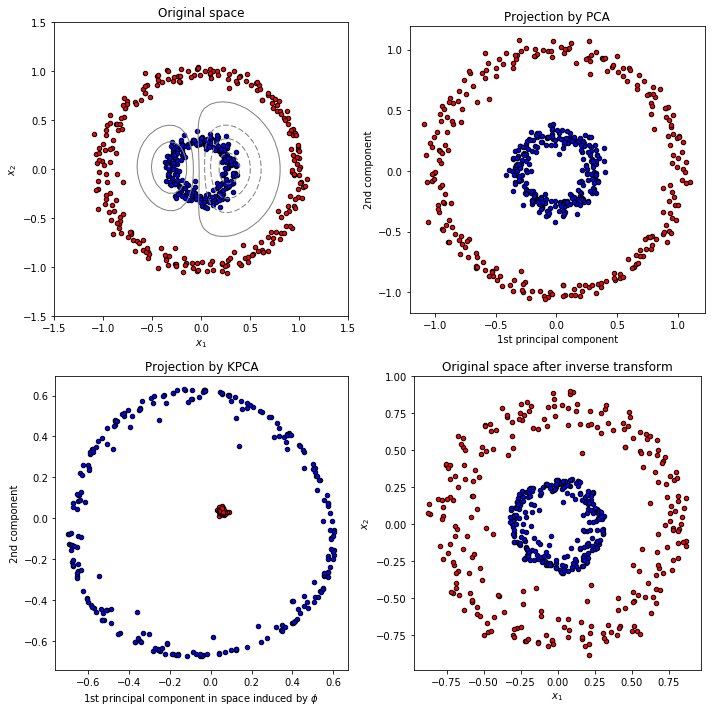

In [53]:
# Plot results

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = Y == 0
blues = Y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel(r"1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.tight_layout()
plt.show()